## Lancement du nouveau studio de cinéma: Analyse des tendances du box-office  
##
 

 ### 1. Compréhension des affaires


Notre entreprise souhaite créer un studio de cinéma. Afin de maximiser les chances de succès au box-office, nous devons comprendre quels types de films (genres) performent le mieux.

####  Objectif du projet:

Dans ce projet d'analyse exploratoire des données (EDA), nous allons explorer différentes caractéristiques
des films à partir des bases de données disponibles. Les objectifs sont les suivants :

1. Analyser la moyenne des votes par genre avec leur titre original
   Identifier quels genres de films reçoivent en moyenne les meilleures notes de la part du public,
    tout en affichant les titres originaux associés.

3. Afficher les 20 films les plus votés avec leur titre original et leur langue
   Identifier les films les plus votés, leur langue d’origine, et analyser leur répartition.

4. Lister les 10 films ayant le plus grand budget de production
     Mettre en évidence les films les plus coûteux à produire et voir s’il y a une corrélation avec leur performance.

 5. Afficher les 10 films les plus populaires avec leur titre et langue
     Observer les films les plus populaires auprès du public et leurs caractéristiques linguistiques.

    
7. Analyser l’évolution du nombre de films produits par année
   Comprendre la tendance de production cinématographique à travers les années.

8. Identifier les 10 genres les plus fréquents
 Déterminer les types de films les plus représentés dans la base de données.

 10. Déterminer les genres de films les plus rentables
 Identifier les genres qui génèrent le plus de bénéfices en comparant les recettes mondiales et les budgets de production.



### 2. Compréhension des données


####  Description des données


L’analyse repose sur l’exploitation de plusieurs jeux de données relatifs à l’industrie cinématographique, issus de sources fiables et reconnues :

- `tn.movie_budgets.csv `: Ce fichier fournit des informations détaillées sur les budgets des films, incluant notamment l’identifiant du film, sa date de sortie, le titre, le budget alloué à la production ainsi que les recettes générées sur le marché domestique et international.

- `tmdb.movies.csv` : Cette base provient de la plateforme The Movie Database (TMDb), qui recense une large variété de films avec leurs caractéristiques, telles que les genres, la langue originale, la popularité, les dates de sortie, le titre original, ainsi que des données relatives aux votes des utilisateurs.

- `bom.movie_gross.csv `: Ce jeu de données présente les recettes brutes des films, détaillées par studio de production, avec une distinction entre recettes domestiques et internationales.


#### Source des données


L’intégration de ces différentes sources, par le biais de clés communes telles que l’identifiant ou le titre du film, permet d’obtenir un ensemble de données cohérent et exhaustif, propice à une analyse approfondie des facteurs influençant le succès commercial des films.



### 3. Préparation des données

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [67]:
tn_budgets = pd.read_csv("tn.movie_budgets.csv",thousands=',')
tmdb = pd.read_csv("tmdb.movies.csv")
bom = pd.read_csv("bom.movie_gross.csv")




In [4]:
# Affichage des colonnes
print(tn_budgets.columns)
print(tmdb.columns)
print(bom.columns)

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [84]:
# Convertir les colonnes 'release_date' en type datetime pour faciliter les opérations sur les dates

tmdb["release_date"] = pd.to_datetime(tmdb["release_date"])
tn_budgets["release_date"] = pd.to_datetime(tn_budgets["release_date"])



In [21]:
# Fusionner les DataFrames tn_budgets et tmdb sur la colonne 'id'
merged1 = pd.merge(tn_budgets, tmdb, on="id", how="left")
print(merged1.head()) 

   id release_date_x                                        movie  \
0   1   Dec 18, 2009                                       Avatar   
1   2   May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3    Jun 7, 2019                                 Dark Phoenix   
3   4    May 1, 2015                      Avengers: Age of Ultron   
4   5   Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  Unnamed: 0 genre_ids  \
0      $425,000,000   $760,507,625  $2,776,345,279         NaN       NaN   
1      $410,600,000   $241,063,875  $1,045,663,875         NaN       NaN   
2      $350,000,000    $42,762,350    $149,762,350         NaN       NaN   
3      $330,600,000   $459,005,868  $1,403,013,963         NaN       NaN   
4      $317,000,000   $620,181,382  $1,316,721,747         NaN       NaN   

  original_language original_title  popularity release_date_y title  \
0               NaN            NaN         NaN           

In [17]:
#Fusionner le DataFrame résultant avec bom en associant la colonne 'movie' de merged1 à la colonne 'title' de bom

final_df = pd.merge(merged1, bom, left_on="movie", right_on="title", how="inner")
print(final_df.head())
print(final_df.shape)



   id release_date_x                                        movie  \
0   2   May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
1   4    May 1, 2015                      Avengers: Age of Ultron   
2   7   Apr 27, 2018                       Avengers: Infinity War   
3   9   Nov 17, 2017                               Justice League   
4  10    Nov 6, 2015                                      Spectre   

  production_budget domestic_gross_x worldwide_gross  Unnamed: 0 genre_ids  \
0      $410,600,000     $241,063,875  $1,045,663,875         NaN       NaN   
1      $330,600,000     $459,005,868  $1,403,013,963         NaN       NaN   
2      $300,000,000     $678,815,482  $2,048,134,200         NaN       NaN   
3      $300,000,000     $229,024,295    $655,945,209         NaN       NaN   
4      $300,000,000     $200,074,175    $879,620,923         NaN       NaN   

  original_language original_title  popularity release_date_y title_x  \
0               NaN            NaN         

#####                        Nettoyage des données



In [85]:

print(tn_budgets.isnull().sum())
print(tmdb.isnull().sum())
print(bom.isnull().sum())




id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


## 4.Analyse des données

In [87]:
#Moyenne des votes par genre avec titre original
genre_counts = tmdb[['vote_average','original_title']].value_counts()
print(genre_counts)


vote_average  original_title                
7.0           Chapter & Verse                   3
8.0           劇場版 魔法少女まどか☆マギカ[後編] 永遠の物語         3
6.3           The Trouble with the Truth        3
7.3           Not Waving but Drowning           3
3.8           The Ultimate Legacy               3
                                               ..
5.4           Addicted to Fresno                1
              Absolutely Fabulous: The Movie    1
              A.R.C.H.I.E.                      1
              A Weekend with the Family         1
10.0          점박이 한반도의 공룡 2: 새로운 낙원             1
Name: count, Length: 25473, dtype: int64


In [88]:
#Top 20 films les plus votés avec titre & langue

top_voted_movies = tmdb.sort_values(by='vote_count', ascending=False).head(20)
top_voted_movies[['original_title', 'original_language', 'vote_count']]




,original_title,original_language,vote_count
4,Inception,en,22186
17383,Deadpool,en,20175
5179,The Avengers,en,19673
6,Avatar,en,18676
11032,Interstellar,en,18597
11021,Guardians of the Galaxy,en,17958
5189,Django Unchained,en,15725
5235,The Hunger Games,en,14587
14177,Mad Max: Fury Road,en,14454
7881,Iron Man 3,en,14155


In [89]:
#Top 10 films avec plus grand budget
top_budget_movies = tn_budgets.sort_values(by='production_budget', ascending=False).head(10)
top_budget_movies[['movie', 'production_budget']]




,movie,production_budget
406,The Peanuts Movie,"$99,000,000"
407,The LEGO Movie 2: The Second Part,"$99,000,000"
408,Robin Hood,"$99,000,000"
5326,And Then Came Love,"$989,000"
409,The Mummy Returns,"$98,000,000"
410,Gangs of New York,"$97,000,000"
411,Alien: Covenant,"$97,000,000"
5332,Ask Me Anything,"$950,000"
5331,Jesse,"$950,000"
5327,Hard Candy,"$950,000"


In [63]:
tmdb[tmdb['vote_count'] > 0].shape


(26517, 10)

In [90]:
# Top 10 genres les plus populaire avec titre et langue original

tmdb[['original_language', 'title', 'popularity']]\
    .sort_values(by='popularity', ascending=False)\
    .head(10)



,original_language,title,popularity
23811,en,Avengers: Infinity War,80.773
11019,en,John Wick,78.123
23812,en,Spider-Man: Into the Spider-Verse,60.534
11020,en,The Hobbit: The Battle of the Five Armies,53.783
5179,en,The Avengers,50.289
11021,en,Guardians of the Galaxy,49.606
20617,en,Blade Runner 2049,48.571
23813,en,Blade Runner 2049,48.571
23814,en,Fantastic Beasts: The Crimes of Grindelwald,48.508
23815,en,Ralph Breaks the Internet,48.057


In [91]:
#Évolution du nombre de films par année
films_par_annee = bom['year'].value_counts().sort_index()
#Affichage des quantités
print(films_par_annee)


year
2010    328
2011    399
2012    400
2013    350
2014    395
2015    450
2016    436
2017    321
2018    308
Name: count, dtype: int64


In [92]:
#Explorer liste genre_ids
print(tmdb.columns)
print(tmdb['genre_ids'].head(20))

#for ids in tmdb['genre_ids']:

#subset = tmdb['genre_ids'].dropna().head(20)
#print(genre_ids)



Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
0              [12, 14, 10751]
1          [14, 12, 16, 10751]
2                [12, 28, 878]
3              [16, 35, 10751]
4                [28, 878, 12]
5              [12, 14, 10751]
6            [28, 12, 14, 878]
7              [16, 10751, 35]
8              [16, 10751, 35]
9     [16, 28, 35, 10751, 878]
10             [16, 35, 10751]
11             [10751, 14, 12]
12                [53, 12, 28]
13                 [16, 10751]
14                    [27, 80]
15         [12, 14, 18, 10749]
16               [28, 53, 878]
17              [10402, 10749]
18                [28, 18, 53]
19              [18, 53, 9648]
Name: genre_ids, dtype: object


In [49]:
#Dictionnaire de donnes
genre_mapping = {
    12: "Action",
    14: "Adventure",
    16: "Animation",
    28: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    35: "History",
    27: "Horror",
    10402: "Music",
    18: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}


In [93]:
#top 10 genres le plus frequents
name_genres = []


for val in tmdb['genre_ids'].dropna():
    try:
        ids = ast.literal_eval(val)  # Convertis string en liste
        names = [genre_mapping.get(i) for i in ids if i in genre_mapping]
        name_genres.extend(names)
    except:
          continue

genre_counts = Counter(name_genres)

print(genre_counts.most_common(10))


[('Mystery', 8303), ('History', 5652), ('Documentary', 4965), ('Thriller', 4207), ('Horror', 3683), ('Comedy', 2612), ('Romance', 2321), ('Science Fiction', 1762), ('Family', 1565), ('Crime', 1515)]


In [80]:
#convertis les valeures en float
tn_budgets['production_budget'] = tn_budgets['production_budget'].replace(r'[$,]', '', regex=True).astype(float)
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].replace(r'[\$,]', '', regex=True).astype(float)

#calcul du benefice
tn_budgets['benefice'] = tn_budgets['worldwide_gross'] - tn_budgets['production_budget']
#affichage des 20 movies les plus rentable

top_benefice = tn_budgets.sort_values(by='benefice', ascending=False)
top_benefice[['movie', 'production_budget', 'worldwide_gross', 'benefice']].head(20)

,movie,production_budget,worldwide_gross,benefice
0,Avatar,425000000.0,2.776345e+09,2.351345e+09
42,Titanic,200000000.0,2.208208e+09,2.008208e+09
6,Avengers: Infinity War,300000000.0,2.048134e+09,1.748134e+09
5,Star Wars Ep. VII: The Force Awakens,306000000.0,2.053311e+09,1.747311e+09
33,Jurassic World,215000000.0,1.648855e+09,1.433855e+09
66,Furious 7,190000000.0,1.518723e+09,1.328723e+09
26,The Avengers,225000000.0,1.517936e+09,1.292936e+09
260,Harry Potter and the Deathly Hallows: Part II,125000000.0,1.341693e+09,1.216693e+09
41,Black Panther,200000000.0,1.348258e+09,1.148258e+09
112,Jurassic World: Fallen Kingdom,170000000.0,1.305773e+09,1.135773e+09


##### Regression avec les genres de films les plus rentables

In [71]:

#Préparation des données pour la régression
X = tn_budgets[['production_budget']]
y = tn_budgets['worldwide_gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [78]:
model1 = LinearRegression()
model1.fit(X_train, y_train)



LinearRegression()

In [79]:
# Résultats
print("Coefficient (a) :", model1.coef_[0])
print("Intercept (b) :", model1.intercept_)
print("Score R² :", model1.score(X_test, y_test))


Coefficient (a) : 3.2000704350857636
Intercept (b) : -7959890.501348466
Score R² : 0.5425621289468551


## 4.visuation des données

In [ ]:
#rentabilite des films

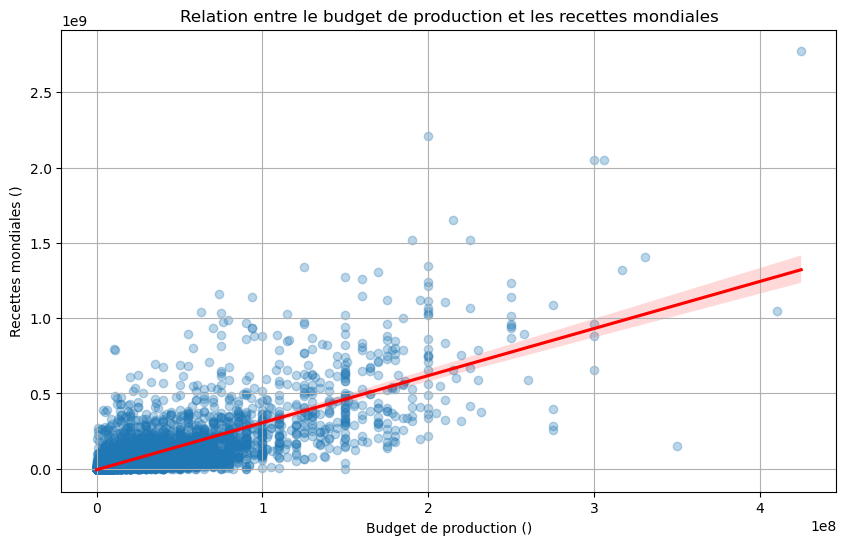

In [96]:
plt.figure(figsize=(10,6))
sns.regplot(x='production_budget', y='worldwide_gross', data=tn_budgets, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relation entre le budget de production et les recettes mondiales')
plt.xlabel('Budget de production ()')
plt.ylabel('Recettes mondiales ()')
plt.grid(True)
plt.savefig('regression_budget_vs_gross.png')
plt.show()


#### Moyenne des votes par genre avec titre original


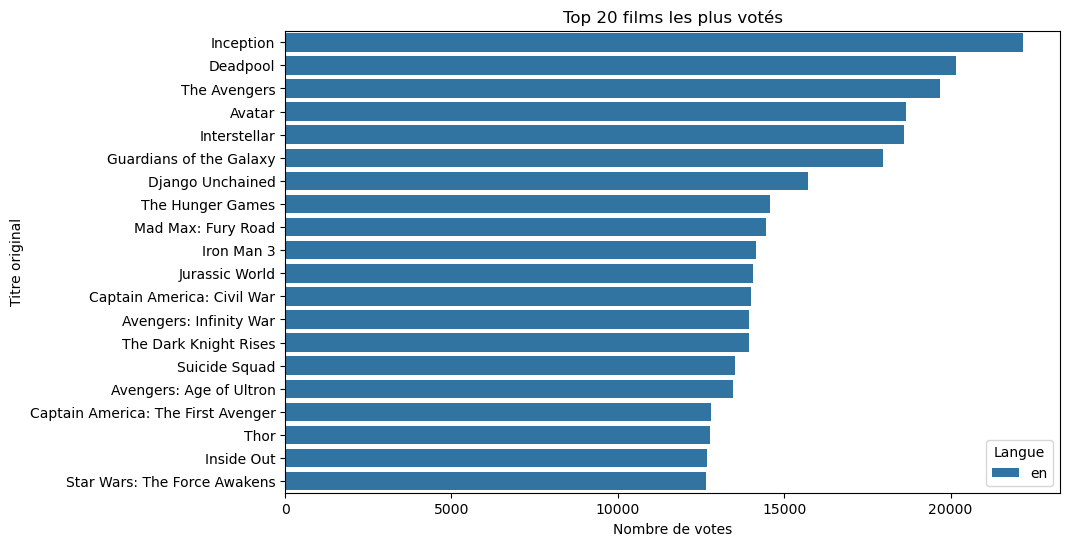

In [98]:
top_20_votes = tmdb.sort_values('vote_count', ascending=False).head(20)
plt.figure(figsize=(10,6))
sns.barplot(x='vote_count', y='original_title', data=top_20_votes, hue='original_language', dodge=False)
plt.title("Top 20 films les plus votés")
plt.xlabel("Nombre de votes")
plt.ylabel("Titre original")
plt.legend(title='Langue')
plt.savefig('votes.png')
plt.show()



#### Top 10 films avec plus grand budget



C:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


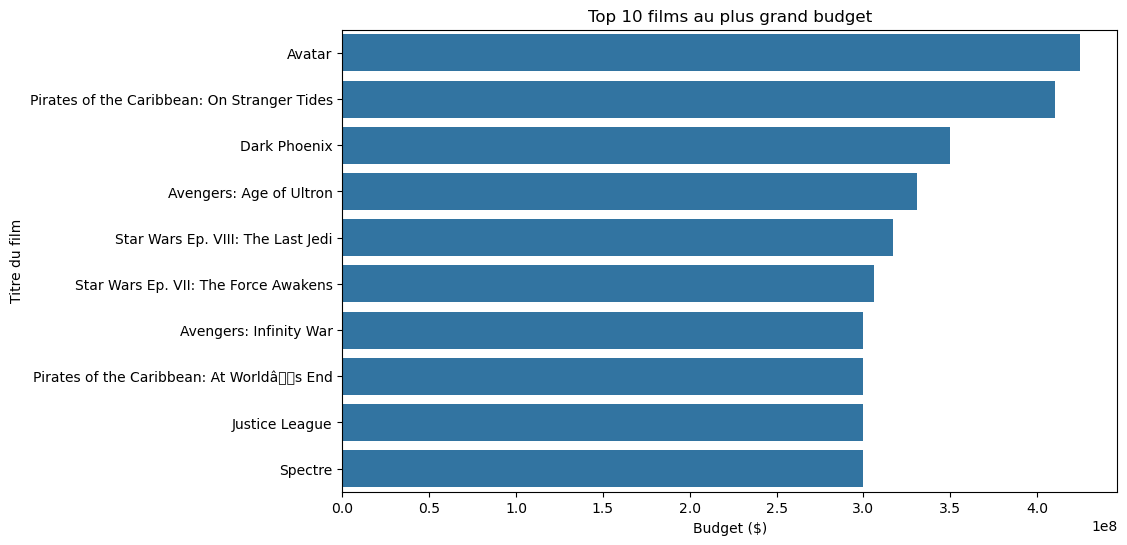

In [97]:
top_budget = tn_budgets.sort_values('production_budget', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='production_budget', y='movie', data=top_budget)
plt.title("Top 10 films au plus grand budget")
plt.xlabel("Budget ($)")
plt.ylabel("Titre du film")
plt.show()



#### Top 10 films les plus populaires avec langue et titre

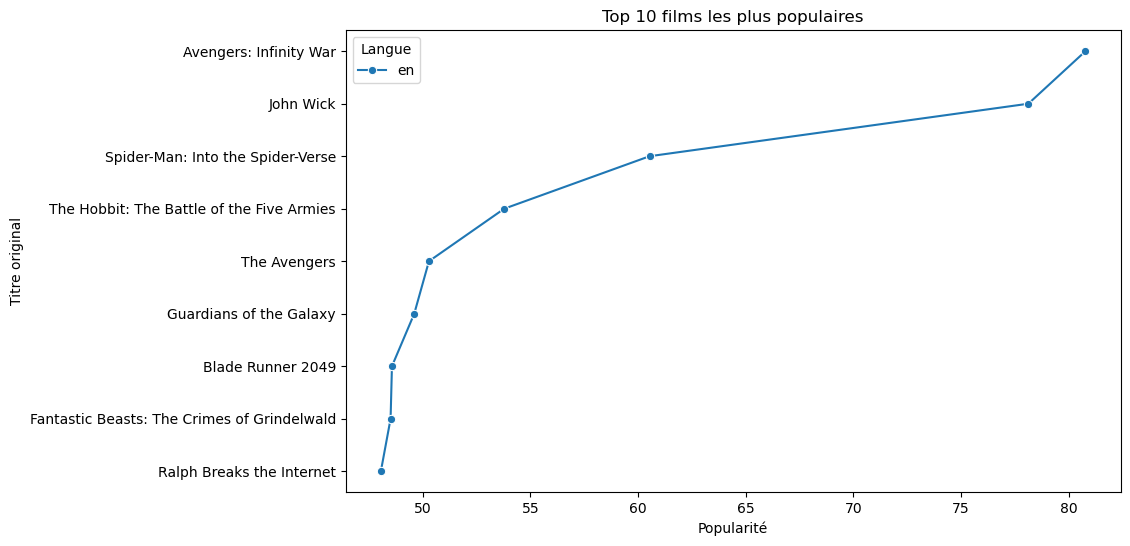

In [6]:
top_popular = tmdb.sort_values('popularity', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.lineplot(x='popularity', y='original_title', data=top_popular, hue='original_language', marker='o')
plt.title("Top 10 films les plus populaires")
plt.xlabel("Popularité")
plt.ylabel("Titre original")
plt.legend(title='Langue')
plt.savefig("visual1.png", dpi=300, bbox_inches='tight')

plt.show()



#### Évolution du nombre de films par année


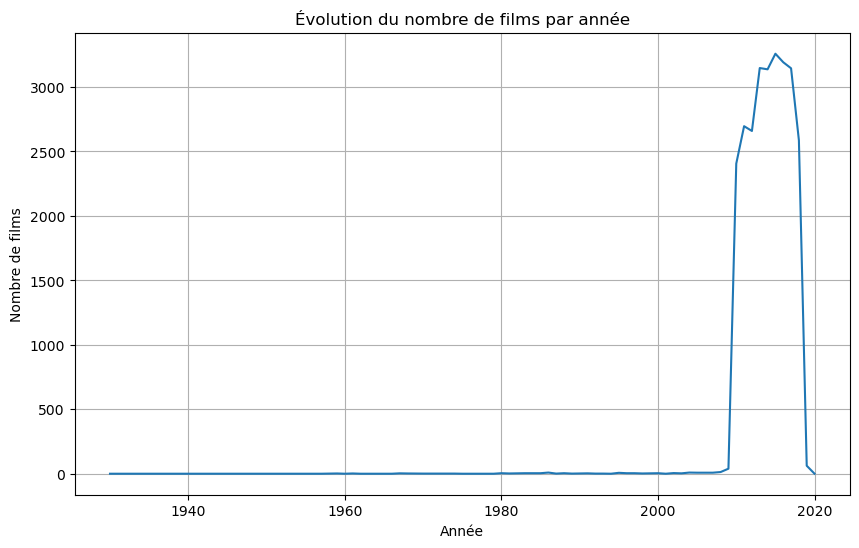

In [78]:
tmdb['year'] = pd.to_datetime(tmdb['release_date'], errors='coerce').dt.year
film_by_year = tmdb['year'].value_counts().sort_index()
film_by_year.plot(kind='line', figsize=(10,6))
plt.title("Évolution du nombre de films par année")
plt.xlabel("Année")
plt.ylabel("Nombre de films")
plt.grid(True)
plt.show()



En conclusion, cette étude met en lumière l’importance des outils de data
science pour analyser et visualiser des données complexes. 
Grâce à l’exploitation des données de popularité des films, 
nous avons pu dégager des tendances claires qui facilitent la prise de décision. 
Ces compétences sont aujourd’hui indispensables pour tout professionnel souhaitant 
tirer parti des données dans son domaine.

